<b><h2><center>Supervised Learning - Classification - Personal Loan Campaign</center></h2></b>
<center><img src="https://www.clix.capital/clixblog/wp-content/uploads/sites/3/2021/05/Untitled-attachment-00004.docx.png" width="800" height="400"></center>

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

   1. To predict whether a liability customer will buy a personal loan or not.
   2. Which variables are most significant.
   3. Which segment of customers should be targeted more.
    
### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Import the necessary packages

In [1]:
# installing Zipcodes library
!pip install zipcodes 

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# to get zipcodes
import zipcodes as zcode

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

### Read the dataset

In [3]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [5]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [6]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [7]:
loan.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset has 5000 rows and 14 columns of data

### Check the data types of the columns for the dataset.

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

**Observations -**
* All the features are of numerical data types.
* Our target variable is *Personal_Loan* column.
* Zipcode, Family, Education, Securities_Account, CD_account, online, CreditCard are all categorical variables.

### Summary of the dataset.

In [9]:
loan.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

**Observations-**
* The average *Age* of the customer is 45 years and the range of customers is 23 years to 67 years.
* The average *Income* of the customers is 73k with minimum of 23k and maximum of 224K.
* The average number of years of *Experience* of the customer is 20 years.
* The number of members in a *Family* ranges from 1 to 4 with an average of 2.
* The average spending of a customer using credit card per month is 1.93K with maximum of 10k.
* *Online* : 59% of the customers are using internet banking facilities.
* *CreditCare* : 29% of the customers are using other banks credit cards.
* *CD_Account*: less than 1% of the customers have CD account with the bank.
* *Securities_Account*: 10% of the customers have securities account.


In [10]:
# checking for unique values in ID column
loan["ID"].nunique()

5000

<IPython.core.display.Javascript object>

* Since all the values in ID column are unique we can drop it

In [11]:
loan.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Check for missing values

In [12]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in out dataset

In [13]:
loan.duplicated().sum()

0

<IPython.core.display.Javascript object>

## Data Preparation

**Processing Zipcode**

Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on location for customers who had borrowed loan during previous campaign. Trying to minimize the number of categories.

In [14]:
loan["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

In [15]:
# get unique zipcodes
list_zipcode = loan.ZIPCode.unique()

<IPython.core.display.Javascript object>

In [16]:
# here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip = {}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype("str"))
    if (
        len(my_city_county) == 1
    ):  # if  zipcode is present then get county else, assign zipcode to county
        county = my_city_county[0].get("county")
    else:
        county = zipcode

    dict_zip.update({zipcode: county})

<IPython.core.display.Javascript object>

In [17]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

<IPython.core.display.Javascript object>

* We got almost all county expect for 96651,92634,93077,92717. We can fix this zip code by searching internet.

In [18]:
dict_zip.update({92717: "Orange County"})
dict_zip.update({92634: "Orange County"})

<IPython.core.display.Javascript object>

* Couldn't find for other zipcodes.

In [19]:
loan["County"] = loan["ZIPCode"].map(dict_zip)

<IPython.core.display.Javascript object>

In [20]:
loan.County.nunique()

40

<IPython.core.display.Javascript object>

In [21]:
loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


<IPython.core.display.Javascript object>

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

**Fixing the data types**

Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education, ZIPCode and County are of int/object type, we can change them to category type.

In [23]:
# converting categorical varaible to category type
category_col = [
    "Personal_Loan",
    "Securities_Account",
    "Family",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
    "Education",
    "County",
]
loan[category_col] = loan[category_col].astype("category")

<IPython.core.display.Javascript object>

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


<IPython.core.display.Javascript object>

**Processing Experience**

In [25]:
# checking negative and zero values for experience.
loan[loan["Experience"] < 0]["Age"].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

* 52 customers from age group 23 - 30 have negative values in experience.

In [26]:
loan[loan["Experience"] < 0].sort_values(by="Experience", ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,Los Angeles County


<IPython.core.display.Javascript object>

In [27]:
loan.groupby(["Age", "Education"])["Experience"].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26                              27             \
Education          3          1         2          3          1          2   
count      19.000000  30.000000  24.00000  24.000000  39.000000  24.000000   
mean       -0.526316   1.433333   0.75000   0.583333   2.461538   1.666667   
std         0.696692   0.817200   0.84699   0.717282   0.755546   1.049500   
min        -2.000000   0.000000  -1.00000   0.000000   1.000000   0.000000   
25%        -1.000000   1.000000   0.00000   0.000000   2.000000   1.000000   
50%        -1.000000   2.000000   1.00000   0.000000   3.000000   1.500000   
75%         0.000000   2.000000   1.00000   1.000000   3.000000   3.000000   
max         1.000000   2.000000   2.00000   2.000000   3.000000   3.000000   

Age                          28                               29             \
Education          3          1          2          3          1          2   
count      28.000000  47.000000  34.000000  22.000000  50.000000  38.000000   
mean        1.392857   3.255319   2.911765   2.409091   4.080000   3.789474   
std         0.994030   0.765225   0.933149   1.181568   0.899887   1.118829   
min         0.000000   2.000000   1.000000  -2.000000   3.000000   2.000000   
25%         1.000000   3.000000   2.000000   2.000000   3.000000   3.000000   
50%         1.000000   3.000000   3.000000   2.500000   4.000000   4.000000   
75%         2.000000   4.000000   4.000000   3.000000   5.000000   5.000000   
max         3.000000   4.000000   4.000000   4.000000   5.000000   5.000000   

Age                          30                               31             \
Education          3          1          2          3          1          2   
count      35.000000  53.000000  48.000000  35.000000  51.000000  41.000000   
mean        3.114286   5.018868   4.645833   4.914286   5.882353   5.512195   
std         1.622841   0.865816   1.020838   1.172514   0.840168   1.098225   
min        -1.000000   4.000000   3.000000   0.000000   5.000000   4.000000   
25%         3.000000   4.000000   4.000000   4.000000   5.000000   5.000000   
50%         3.000000   5.000000   5.000000   5.000000   6.000000   5.000000   
75%         4.000000   6.000000   5.250000   6.000000   7.000000   7.000000   
max         5.000000   6.000000   6.000000   6.000000   7.000000   7.000000   

Age                          32                               33             \
Education          3          1          2          3          1          2   
count      33.000000  60.000000  34.000000  26.000000  53.000000  34.000000   
mean        5.090909   6.950000   6.941176   6.500000   8.018868   7.617647   
std         1.958374   0.768556   0.982920   1.606238   0.771875   1.181029   
min         1.000000   6.000000   5.000000   2.000000   7.000000   6.000000   
25%         5.000000   6.000000   6.000000   6.000000   7.000000   7.000000   
50%         5.000000   7.000000   7.000000   6.000000   8.000000   7.000000   
75%         7.000000   8.000000   8.000000   8.000000   9.000000   9.000000   
max         7.000000   8.000000   8.000000   8.000000   9.000000   9.000000   

Age                          34              

<IPython.core.display.Javascript object>

Its seems experience is negative for all observation with for age 23,24, and few others . Based on their age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [28]:
loan.loc[loan["Experience"] < 0, "Experience"] = np.abs(loan["Experience"])

<IPython.core.display.Javascript object>

In [29]:
# Checking age and income for customers with 0 experience.
loan[loan["Experience"] == 0]["Age"].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

* We need to impute this column before modelling.

## Exploratory Data Analysis

### Univariate analysis

In [30]:
# function to create histogram and boxplot


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Age

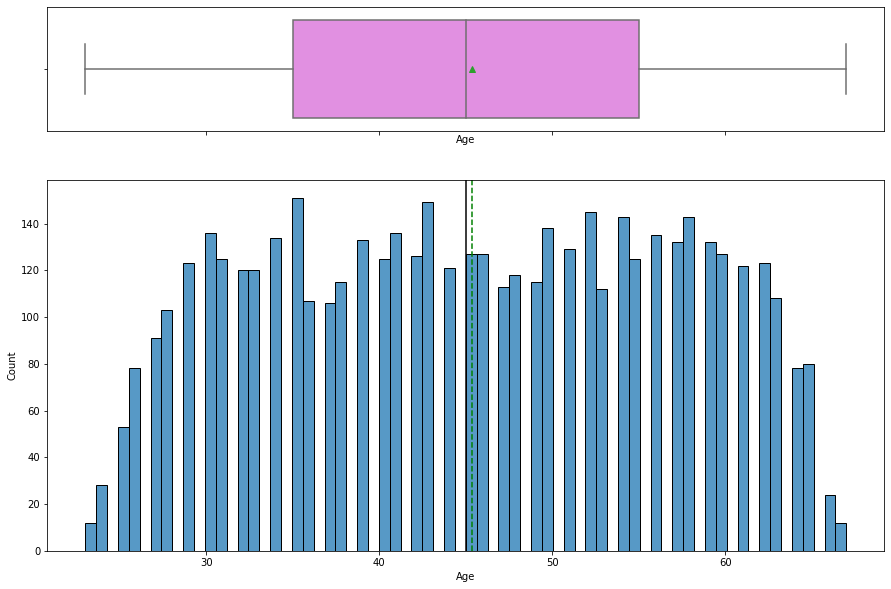

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(loan, "Age", bins=70)

* The distribution of Age column is not skewed.
* No outliers present in this column.

### Observations on Experience

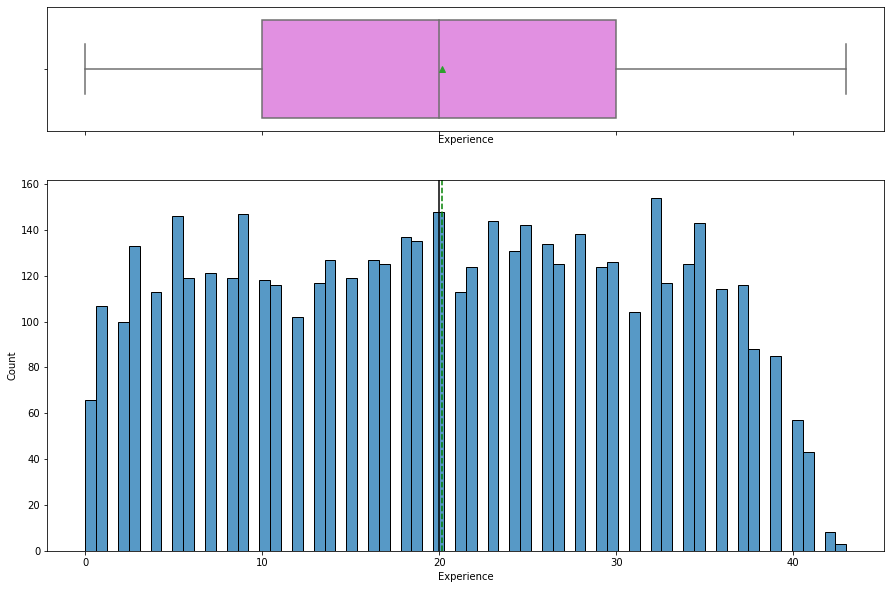

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(loan, "Experience", bins=70)

* Mean and median are same value.
* Distribution is not skewed.
* No outliers present in Experience column.

### Observations on Income

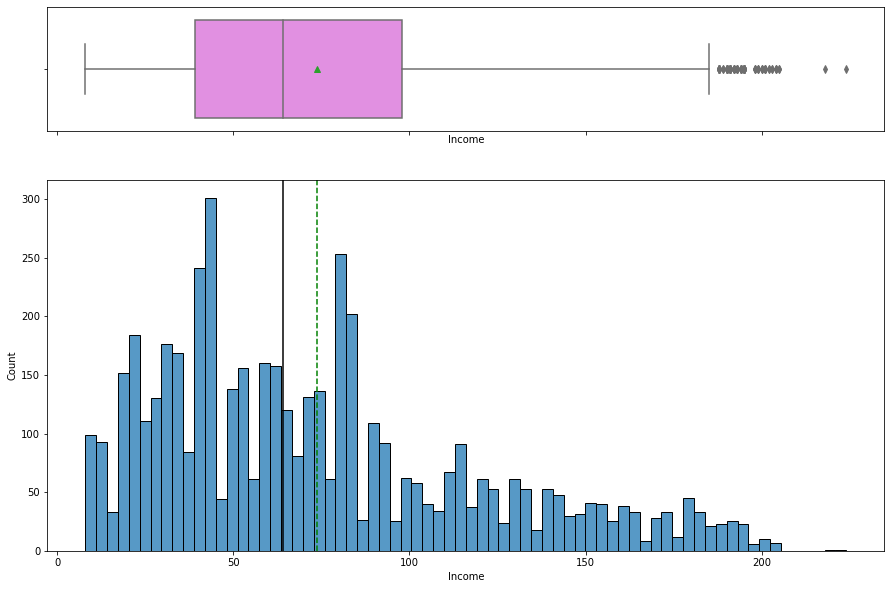

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(loan, "Income", bins=70)

* The distribution of Income skewed towards right.
* There are extreme values are seen above 200k USD.

### Observations on Family

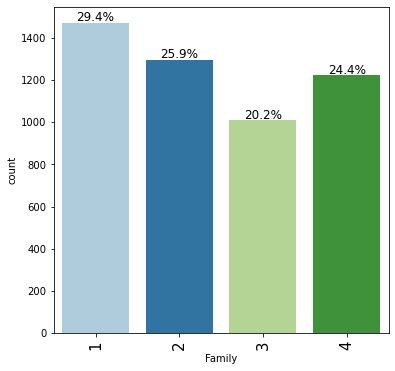

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(loan, "Family", perc=True)

* 29% of the customers are unmaried and 25% of the customers are married.
* 20% of the customers have 1 children and 24% of the customers have 2 children.

### Observations on CCAvg

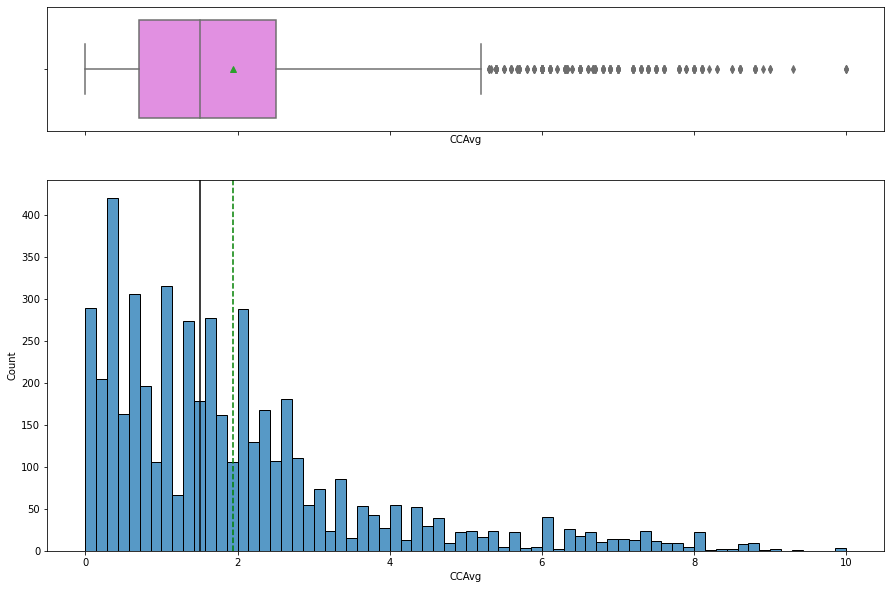

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(loan, "CCAvg", bins=70)

* CCAvg column is largely skewed towards right and has more outliers.
* Most of the customers spends in the range of 700 to 2000 USD.
* The average spending of customer per month is close to 2000 USD.


### Observations on Education

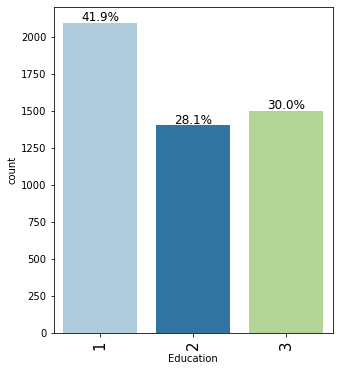

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(loan, "Education", perc=True)

* Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* More than 50% of the customers are Graduates and Professionals.
* 41% of the customers are undergraduates.

### Observations on Mortgage

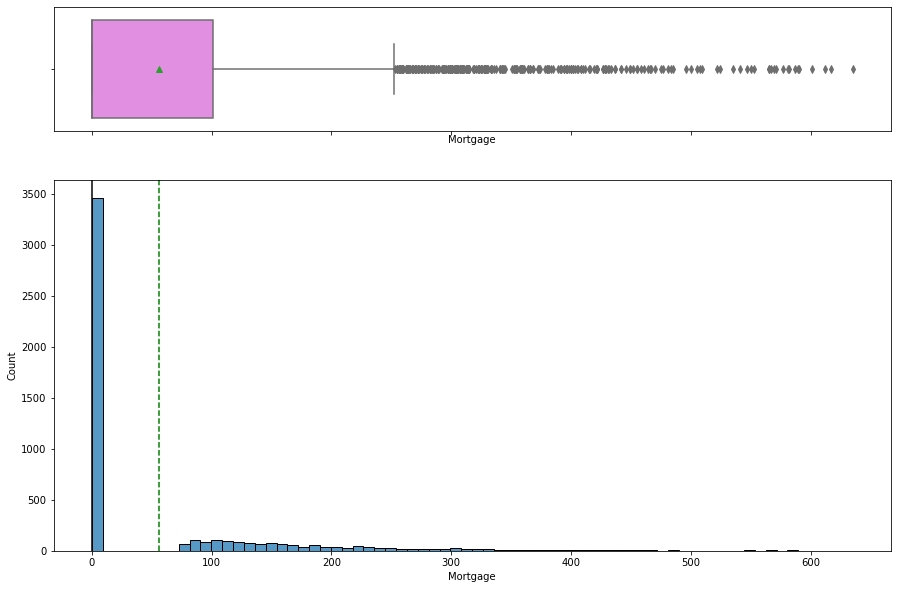

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(loan, "Mortgage", bins=70)

* Mortgage column is highly skewed towards right with more outliers.
* Most of the customers have mortgage below 100 dollars.

### Observations on Personal_Loan

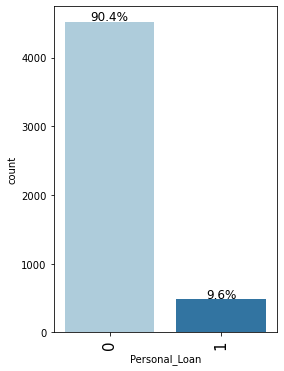

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(loan, "Personal_Loan", perc=True)

* Personal_Loan is our target column.
* Only 9.6% of the customers have accepted the personal loan, 90% of customers rejected the loan offered to them.

### Observations on Securities_Account

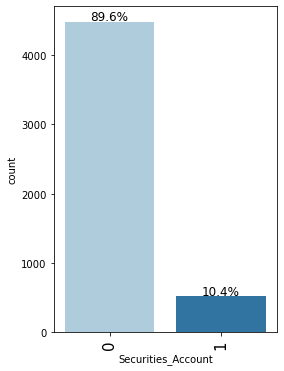

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(loan, "Securities_Account", perc=True)

* Only 10.4% of the customers have Securities_Account with the bank.

### Observations on CD_Account

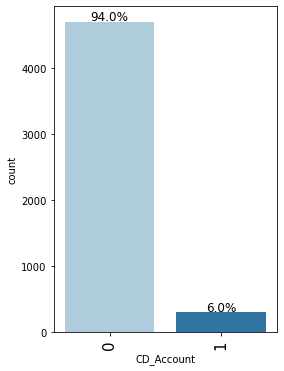

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(loan, "CD_Account", perc=True)

* Only 6% of the customers have CD_Account with the bank.

### Observations on Online

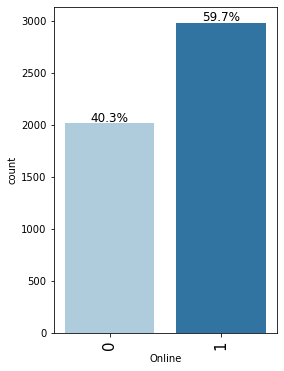

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(loan, "Online", perc=True)

* Nearly 60% of the customers are using internet banking facilities.

### Observations on CreditCard

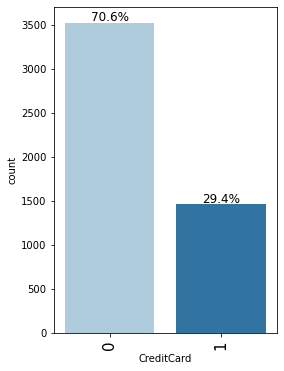

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(loan, "CreditCard", perc=True)

* Most of the customers (70%) don't have other bank credit cards.
* Nearly 30% of the customers have other bank credit cards.

### Observations on County

In [44]:
loan.groupby(["County", "Personal_Loan"])["Personal_Loan"].agg({"size"}).unstack()

size     
Personal_Loan             0    1
County                          
93077                     1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='County'>

<Figure size 1080x1728 with 0 Axes>

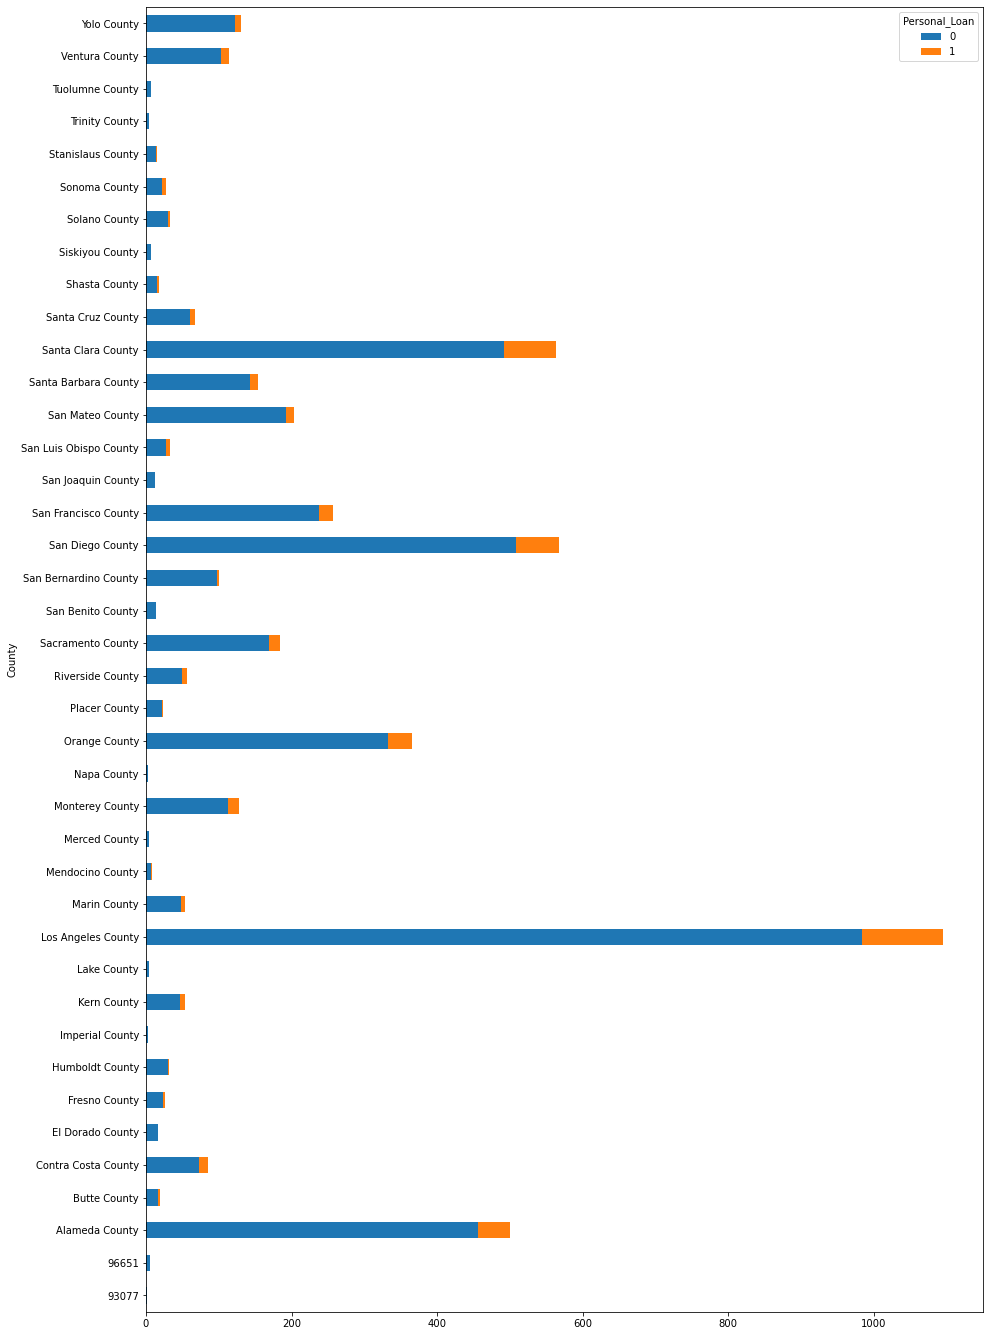

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 24))

pd.crosstab(
    index=loan["County"], columns=loan["Personal_Loan"].sort_values(ascending=False)
).plot(kind="barh", stacked=True, figsize=(15, 24))

* It can be seen the percentage of loan taken from various country differ.
* There are so many county converting them to regions will help in our model.

### Converting the county to regions based on https://www.calbhbc.org/region-map-and-listing.html**

In [46]:
counties = {
    "Los Angeles County": "Los Angeles Region",
    "San Diego County": "Southern",
    "Santa Clara County": "Bay Area",
    "Alameda County": "Bay Area",
    "Orange County": "Southern",
    "San Francisco County": "Bay Area",
    "San Mateo County": "Bay Area",
    "Sacramento County": "Central",
    "Santa Barbara County": "Southern",
    "Yolo County": "Central",
    "Monterey County": "Bay Area",
    "Ventura County": "Southern",
    "San Bernardino County": "Southern",
    "Contra Costa County": "Bay Area",
    "Santa Cruz County": "Bay Area",
    "Riverside County": "Southern",
    "Kern County": "Southern",
    "Marin County": "Bay Area",
    "San Luis Obispo County": "Southern",
    "Solano County": "Bay Area",
    "Humboldt County": "Superior",
    "Sonoma County": "Bay Area",
    "Fresno County": "Central",
    "Placer County": "Central",
    "Butte County": "Superior",
    "Shasta County": "Superior",
    "El Dorado County": "Central",
    "Stanislaus County": "Central",
    "San Benito County": "Bay Area",
    "San Joaquin County": "Central",
    "Mendocino County": "Superior",
    "Tuolumne County": "Central",
    "Siskiyou County": "Superior",
    "Trinity County": "Superior",
    "Merced County": "Central",
    "Lake County": "Superior",
    "Napa County": "Bay Area",
    "Imperial County": "Southern",
    93077: "Southern",
    96651: "Bay Area",
}

<IPython.core.display.Javascript object>

In [47]:
# creating new column regions by mapping the counties to County column
loan["Regions"] = loan["County"].map(counties)

<IPython.core.display.Javascript object>

In [48]:
loan["Regions"].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central'], dtype=object)

<IPython.core.display.Javascript object>

In [49]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
Regions               0
dtype: int64

<IPython.core.display.Javascript object>

### Observations on Regions

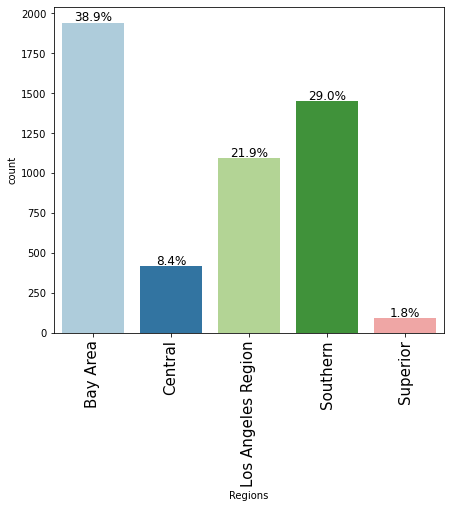

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(loan, "Regions", perc=True)

* Nearly 39% of the customers are from bay area followed by southern and los angeles regions with 29% and 21%.

### Bivariate Analysis

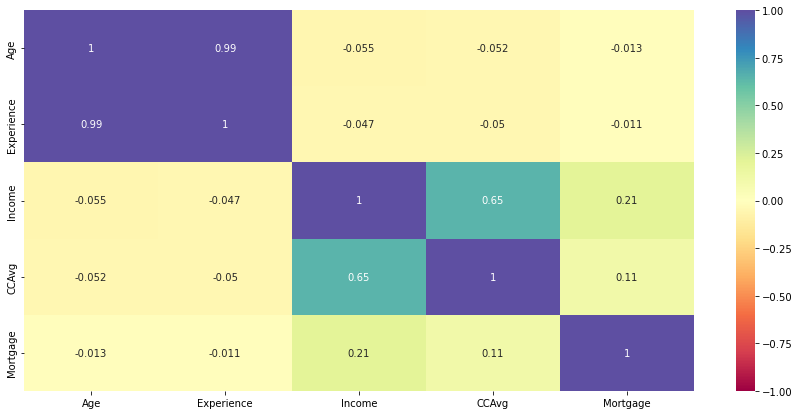

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* *Age* column is highly positively correlated with Experience column. If the age increases, experience also increses.
* *Income* column shows positive correlation with CCAvg and Mortgage. It is obvious that a customer with high income spends more and willing to take loans so that he can pay the loan in time.
* *Income* column shows negative correlation with Experience and Age. 
* *Mortgage* shows some correlation with Income and CCAvg.

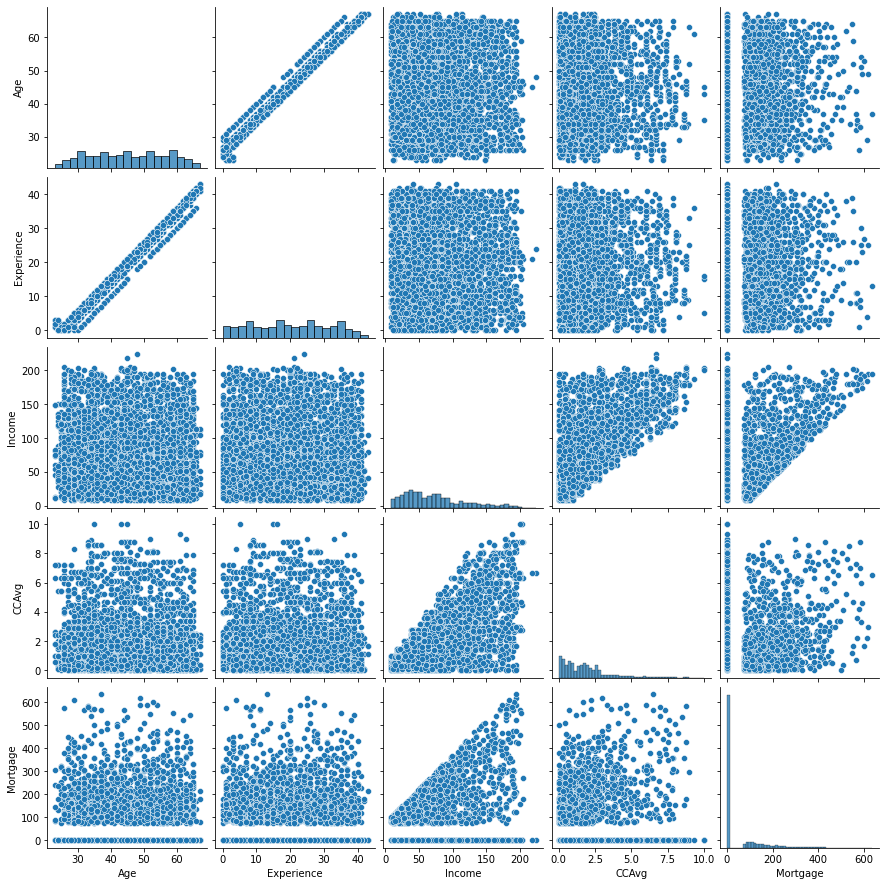

<IPython.core.display.Javascript object>

In [52]:
sns.pairplot(data=loan)
plt.show()

In [53]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Observation on Education and Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


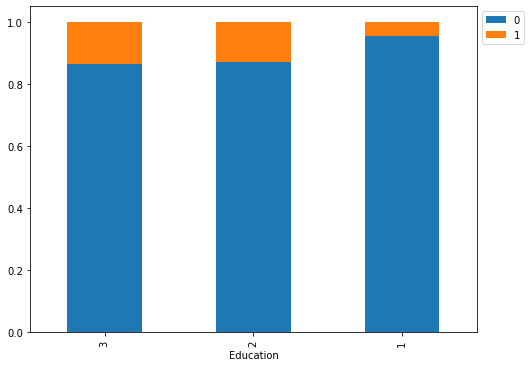

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(loan, "Education", "Personal_Loan")

* Graduates and Professionals are more willing to buy personal loans than undergraduates.

### Observations on Securities_Account and Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


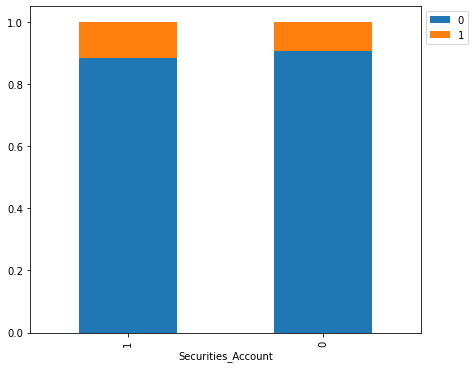

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

* Both the customers with Securities_Account and without Securities_Account are willing to buy personal loans.

### Observations on CD_Account and Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


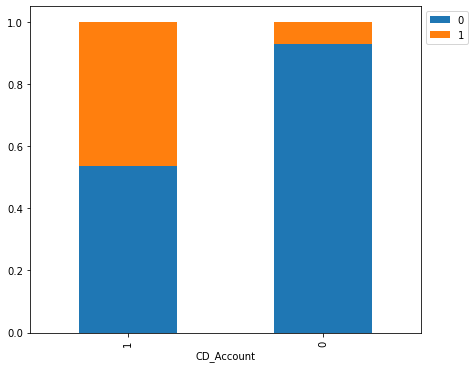

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

* Customers who has CD_Account with bank are more willing to buy personal loans.

### Observations on Online and Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


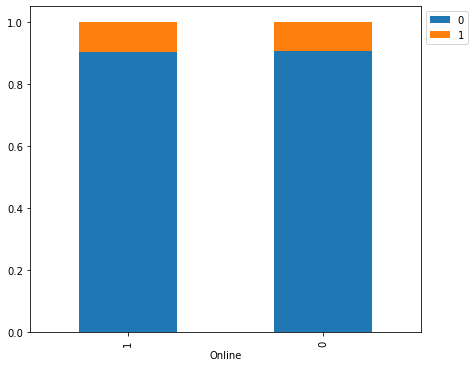

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(loan, "Online", "Personal_Loan")

* Both Customers who use internet banking facilities and who don't use internet banking facilities are willing to buy personal Loans.

### Observations on CreditCard and Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


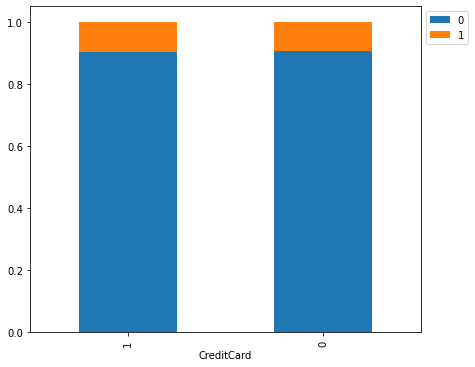

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

* Both customers who has other bank credit cards and who don't have other bank credit cards are willing to buy personal loans.

### Multivariate Analysis

### Observation on Age and Experience with Personal Loan

<AxesSubplot:xlabel='Age', ylabel='Experience'>

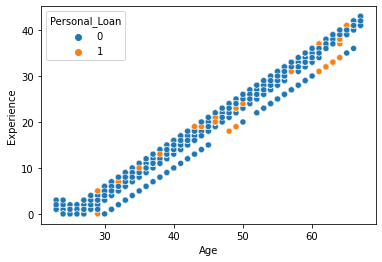

<IPython.core.display.Javascript object>

In [59]:
sns.scatterplot(data=loan, x="Age", y="Experience", hue="Personal_Loan")

### Observation on Age, Experience and CD_Account

<AxesSubplot:xlabel='Age', ylabel='Experience'>

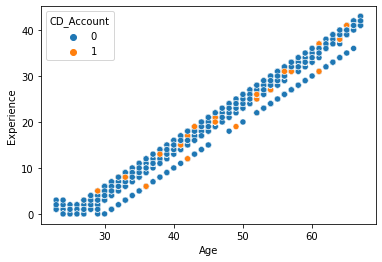

<IPython.core.display.Javascript object>

In [60]:
# Scatter plot of Age and Experience with hue as CD_Account

sns.scatterplot(data=loan, x="Age", y="Experience", hue="CD_Account")

* Age and Experience is highly positively correlated.
* Customers with age of 30+years and 5+ years of experience have CD_Account. 

### Observation on Age, Experience and Online

<AxesSubplot:xlabel='Age', ylabel='Experience'>

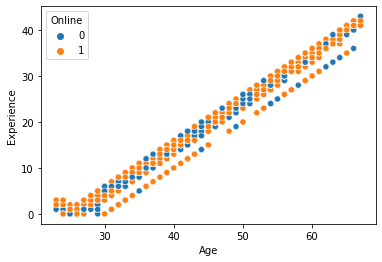

<IPython.core.display.Javascript object>

In [61]:
# Scatterplot of Age and Experience wiht hue as Online

sns.scatterplot(data=loan, x="Age", y="Experience", hue="Online")

* In all age groups and experience level, most of the customers are using internet banking facilities.

### Observation on Income, Personal_Loan and CD_Account

Text(0.5, 1.0, 'Income and CCAvg with hue as Personal Loan')

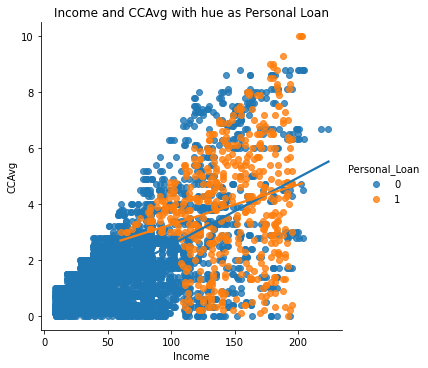

<IPython.core.display.Javascript object>

In [62]:
# Scatterplot of Income and Personal_Loan with hue as CD_Account

sns.lmplot(data=loan, x="Income", y="CCAvg", hue="Personal_Loan", ci=False)
plt.title("Income and CCAvg with hue as Personal Loan")

* Customers with more Income are tend to buy personal loans.

### Lineplot and scatter plots of Mortgage and Income with Personal_Loan

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

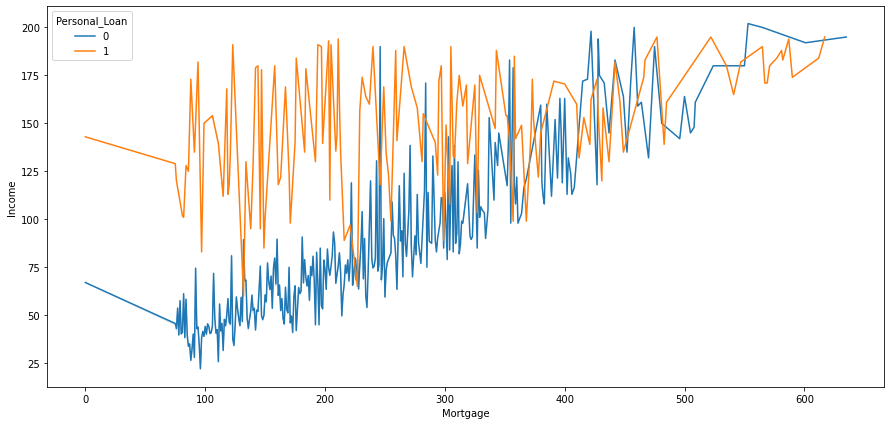

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=loan, x="Mortgage", y="Income", hue="Personal_Loan", ci=False)

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

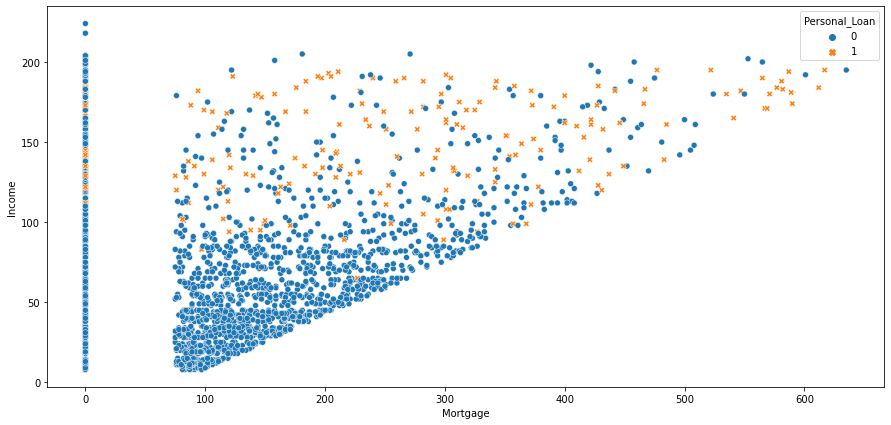

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=loan, x="Mortgage", y="Income", hue="Personal_Loan", style="Personal_Loan"
)

* Customers with income greater than 50k dollars willing to buy personal loans.

### Observation on Mortgage, CCAvg, Personal_Loan

<AxesSubplot:xlabel='Mortgage', ylabel='CCAvg'>

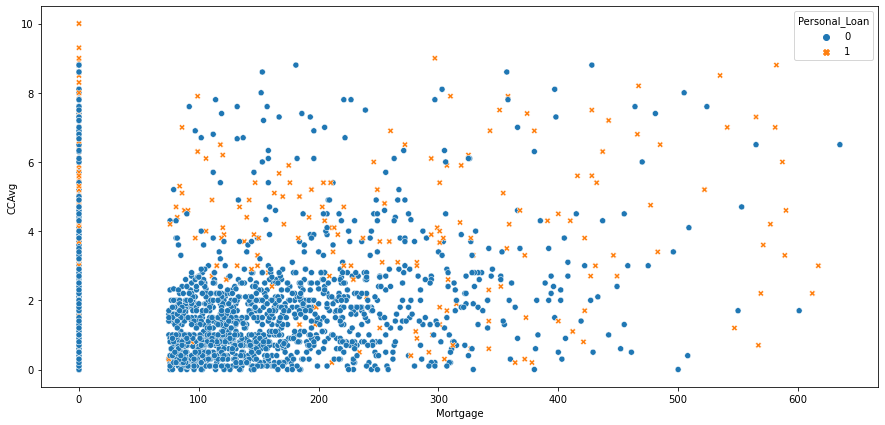

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=loan, x="Mortgage", y="CCAvg", hue="Personal_Loan", style="Personal_Loan"
)

* Credit card spending will not affect the purchase of personal loan.

## <a id='link1'>Summary of EDA</a>

### Data Description:

- There are 5000 rows and 14 columns in dataset.
- There are no missing values and no duplicates in this dataset.
- All features are numerical data types.

### Observations from EDA:

* `Age`:
    * The age of the customers are in range of 23 years to 67 years with the average of 45 years. 
    * Most of the customers are in the age of 35 years to 55 years.
* `Experience` : 
    * The experience of most of the customers ranges from 10 years to 30 years.
    * The average experience of the customers is 20 years.
    * The maximum experience of the customers is 43 years.
* `Income`:
    * Income of most of the customers ranges from 39000 USD to 98000 USD.
    * Average income of the customers is 73000 USD.
    * The maximum income of the customers is 224000 USD.
* `Family`:
   * 29% of the customers are unmaried and 25% of the customers are married.
   * 20% of the customers have 1 children and 24% of the customers have 2 children.
* `CCAvg`:
    * Average spending of customers per month is close to 2000 USD.
    * Most of the customers spends in range of 700 USD to 2500 USD.
    * Maximum spending of customers is 10000 USD.
* `Education`:
    * Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
    * More than 50% of the customers are Graduates and Professionals.
    * 41% of the customers are undergraduates.
* `Mortgage`:
    * Most of the customers have mortgage below 100 dollars.
    * Average mortgage of the customers is 56 USD.
    * Maximum mortgage of the customers is 635 USD>
* `Personal_Loan`:
    * Personal_Loan is our target column.
    * Only 9.6% of the customers have accepted the personal loan.
    * 90% of customers rejected the loan offered to them.
* `Securities_Account`:
    * Only 10.4% of the customers have Securities_Account with the bank.
* `CD_Account`:
    * Only 6% of the customers have CD_Account with the bank.
* `Online`:
    * Nearly 60% of the customers are using internet banking facilities.
* `CreditCard`:
    * Most of the customers (70%) don't have other bank credit cards.
    * Nearly 30% of the customers have other bank credit cards.
    
### Personal_Loan Vs different features
* `Education and Personal_Loan`:
    * Graduates and Professionals are more willing to buy personal loans than undergraduates.
* `Securities_Account and Personal_Loan`:
    * Both the customers with Securities_Account and without Securities_Account are willing to buy personal loans.
* `CD_Account and Personal_Loan`:
    * Customers who has CD_Account with bank are more willing to buy personal loans.
* `Online and Personal_Loan`:
    * Both Customers who use internet banking facilities and who don't use internet banking facilities are willing to buy personal Loans.
* `CreditCard and Personal_Loan`:
    * Both customers who has other bank credit cards and who don't have other bank credit cards are willing to buy personal loans.
    
### Insights
* Customers with income greater than 50k dollars willing to buy personal loans.
* Graduates and Professionals are more willing to buy personal loans.
* Customers who has CD_Account with bank are more willing to buy personal loans.
* Credit card spending will not affect the purchase of personal loan.
* Usage of Online banking facilities will not affect the purchase of personal loan.
* Customers with other bank credit cards will not affect the purchase of personal loan.

### Actions for data preparation
* Detect outliers and treat outliers.
* ZIPCode column and County column should be dropped before modelling.

In [66]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  Regions             5000 non-null   object  
dtypes: category(9), float64(1), int64(4), 

<IPython.core.display.Javascript object>

### Data Preparation

### Outliers detection using boxplot

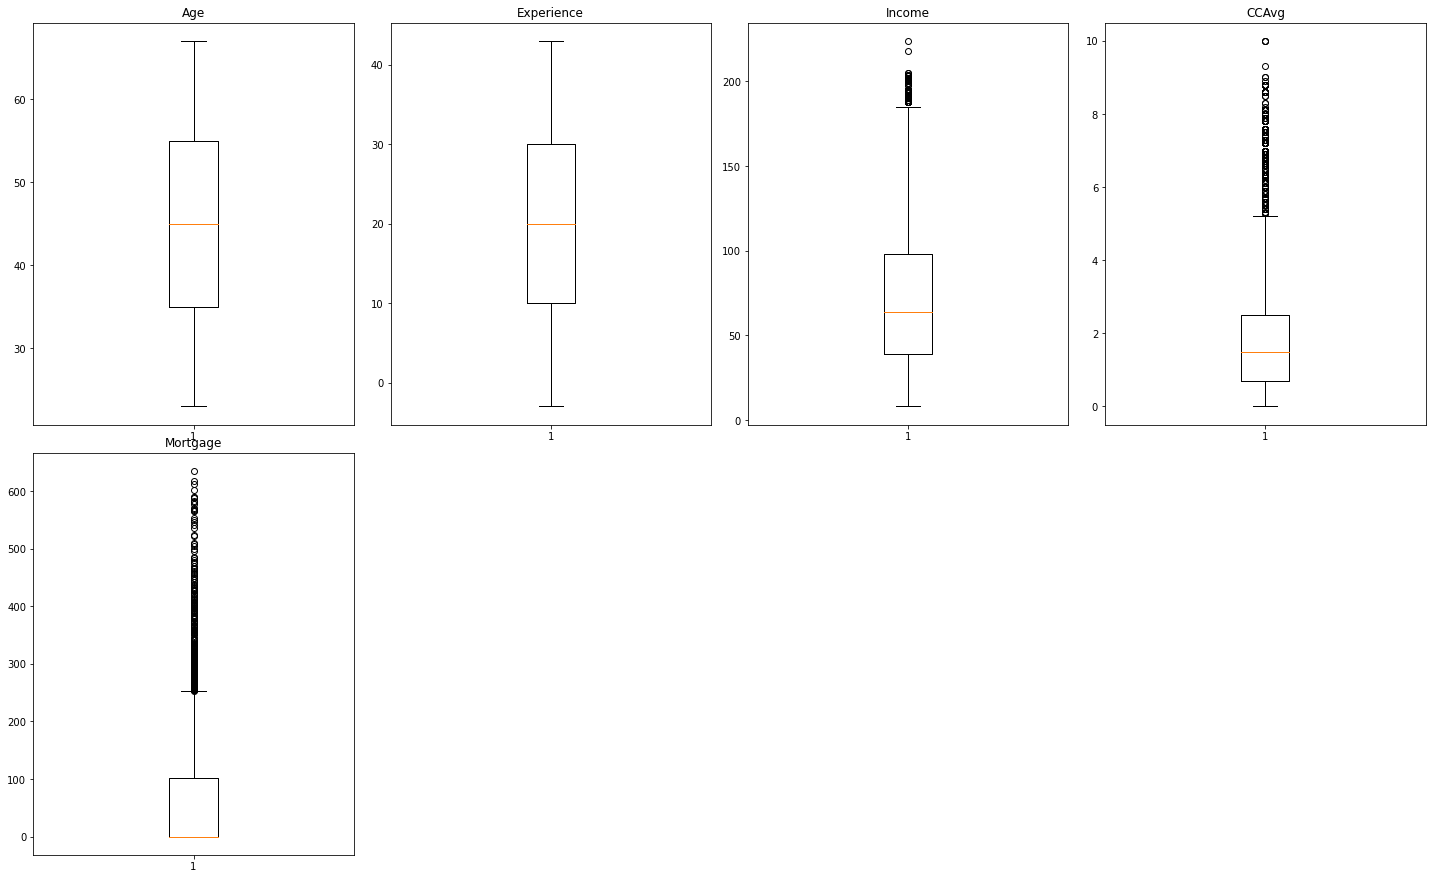

<IPython.core.display.Javascript object>

In [67]:
numerical_col = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers are seen in Income, CCAvg and Mortgage columns.

### Treating Outliers
* Treating Outliers in column Income, CCAvg, Mortgage columns

In [68]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [69]:
outlier_cols = ["Income", "CCAvg", "Mortgage"]
data = treat_outliers_all(loan, outlier_cols)

<IPython.core.display.Javascript object>

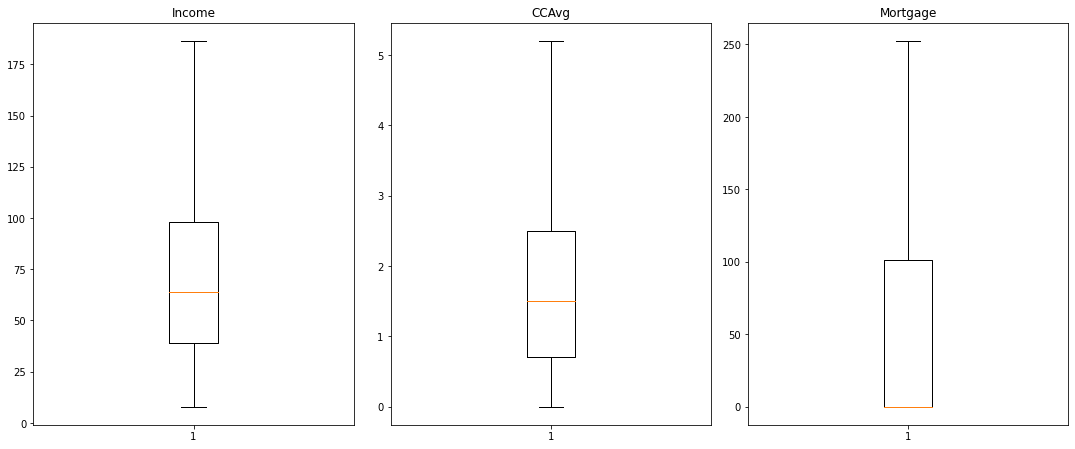

<IPython.core.display.Javascript object>

In [70]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(outlier_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers are treated successfully.

In [71]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   float64 
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  Regions             5000 non-null   object  
dtypes: category(9), float64(3), int64(2), 

<IPython.core.display.Javascript object>

**Dropping unnecessary columns**
* ZIPCode and County is dropped instead Regions column is helpful in model.
**CreditCard, Online, CCAvg are dropped because:**
* `CreditCard`: Customers with/without other bank credit cards does not affect the purchase of Personal loan.
* `Online`: Customers using/not using internet banking facilities does not affect the purchase of Personal loan.
* `CCAvg`: Customers spending will not affect the purchase of personal loan.

In [72]:
drop_cols = ["ZIPCode", "County", "CreditCard", "Online", "CCAvg"]

<IPython.core.display.Javascript object>

In [73]:
loan.drop(columns=drop_cols, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [74]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   Family              5000 non-null   category
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   float64 
 6   Personal_Loan       5000 non-null   category
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Regions             5000 non-null   object  
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 220.5+ KB


<IPython.core.display.Javascript object>

### Split Data


In [75]:
X = loan.drop("Personal_Loan", axis=1)  # Features
y = loan["Personal_Loan"]  # Labels (Target Variable)

<IPython.core.display.Javascript object>

### Feature Engineering

### Encode categorical variables by creating dummy variables

In [76]:
# define a function for encoding
def encode_cat_vars(x):
    x = pd.get_dummies(
        x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist()
    )
    return x


# independent variables with encoded categorical variables
X_num = encode_cat_vars(X)
X_num.head()

,Age,Experience,Income,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Regions_Bay Area,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior
0,25,1,49.0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
1,45,19,34.0,0.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
2,39,15,11.0,0.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
3,35,9,100.0,0.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,35,8,45.0,0.0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [77]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=1
)
print(X_train.shape, X_test.shape)

(3500, 20) (1500, 20)


<IPython.core.display.Javascript object>

In [78]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [79]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will contribute to the revenue but in reality the customer would not have contribute to the revenue. - Loss of resources

2. Predicting a customer will not contribute to revenue but in reality the customer would have contributed to revenue. - Loss of opportunity

### Which case is more important? 

* If we predict a customer who was going to contribute to the revenue as a customer who will not contribute to the revenue.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [81]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression

In [82]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Finding the coefficients

In [83]:
# let us check the coefficients and intercept of the model
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T
coef_df = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Regions_Bay Area,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior,Intercept
Coefficients,0.012125,-0.00934,0.070422,0.000793,-1.067635,-0.910369,1.400972,0.577,-2.557648,1.180932,1.376684,0.283091,-0.283122,-1.296207,1.296176,0.147394,0.058009,0.0391,0.319198,-0.563732,-9.623085


<IPython.core.display.Javascript object>

**Observation**
* Coefficients of Experience, Family size 1 and 2, Securities_Account_1, Education_1, Regions_Superior, CD_Account_0 are negative, increase in these values leads the customer not to buy personal loan from the bank.
* Coefficients of Age, Income, Mortgage, Family size of 3 and 4, Education level of 2 and 3, Securities_Account_0, CD_Account_1 and regions of bay area, central, los angeles, southern are positive, increase in these values leads the customers to buy personal loan with the bank.

### Odds from coefficients

In [84]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Regions_Bay Area,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior
Odds,1.012199,0.990703,1.072961,1.000793,0.343821,0.402376,4.059145,1.780689,0.077487,3.257410,3.961743,1.327226,0.753428,0.273567,3.655292,1.158810,1.059725,1.039875,1.376024,0.569081
Change_odd%,1.219851,-0.929682,7.296051,0.079294,-65.617919,-59.762446,305.914499,78.068914,-92.251321,225.741032,296.174259,32.722566,-24.657220,-72.643264,265.529240,15.880996,5.972457,3.987467,37.602386,-43.091882


<IPython.core.display.Javascript object>

### Coefficient interpretations
* `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer having personal loan by 1 time or a 1.2% decrease in odds of having personal loan.
* `Experience`: Holding all other features constant a 1 unit change in Experience will decrease the odds of a customer having personal loan by 0.99 times or a ~1% decrease in odds of having personal loan.
* `Income`: Holding all other features constant a 1 unit change in Income will decrease the odds of a customer having personal loan by 1.07 times or a 7.2% decrease in odds of having personal loan.
* The customers with `family` size 3 are more willing to take personal loan with the bank.
* `Education` level of customer is higher than chances of taking personal loan will be higher.
* Customers with `Education` level of undergraduates took personal loan less.
* Customers who has `CD_Account` with the bank are more willing to take personal loan.
* Customers from Bay area `region` are more willing to take personal loan.

### Checking model performance on training set

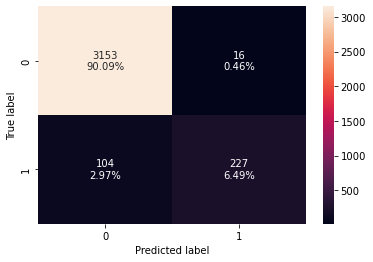

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [86]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.965714,0.685801,0.934156,0.790941


<IPython.core.display.Javascript object>

### Checking performance on test set

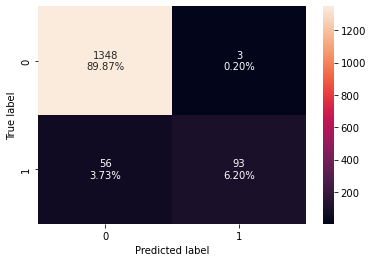

<IPython.core.display.Javascript object>

In [87]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [88]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.960667,0.624161,0.96875,0.759184


<IPython.core.display.Javascript object>

* Model is giving good and generalized results on training and test set.

## ROC-AUC

### ROC-AUC on training set

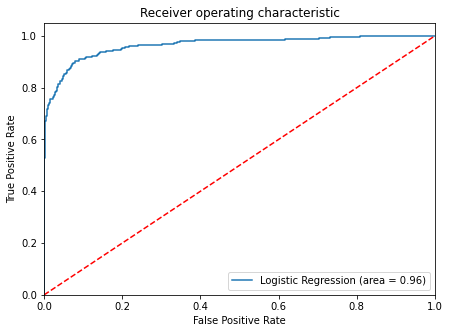

<IPython.core.display.Javascript object>

In [89]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC on test set

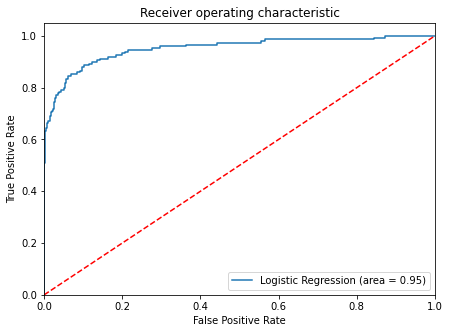

<IPython.core.display.Javascript object>

In [90]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Insights:

* **True Positives:**
    Reality: A customer wanted to take personal Loan. Model Prediction: The customer will take personal loan. Outcome: The model is good.

* **True Negatives:**
    Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected .

* **False Positives:**
    Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

* **False Negatives:**
    Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

### Right Metric to use:

Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the model .We have recall as 68 on train and 62 on test. False negative are 104 and 56 on train and test. We can further improve this score using Optimal threshold for ROC AUC curve and precision recall curve

## Model Performance Improvement

Let's see if the recall can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [91]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1176254081801226


<IPython.core.display.Javascript object>

### Checking model performance on training set

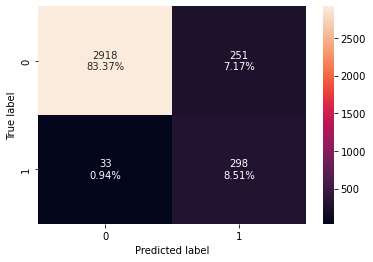

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [93]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.918857,0.900302,0.542805,0.677273


<IPython.core.display.Javascript object>

### Checking model performance on test set

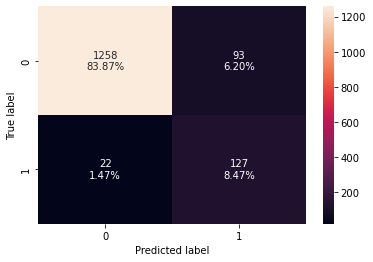

<IPython.core.display.Javascript object>

In [94]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [95]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.923333,0.852349,0.577273,0.688347


<IPython.core.display.Javascript object>

* The Recall of the model for both training and test set has improved but the Precision and F1 score has reduced.
* With 0.117 Threshold the Recall score has improved from 62 to 85 on test data with 92% accuracy. Also False negative values has decreased to 22 from 56 for test data. 

**Let's use Precision-Recall curve and see if we can find a better threshold**

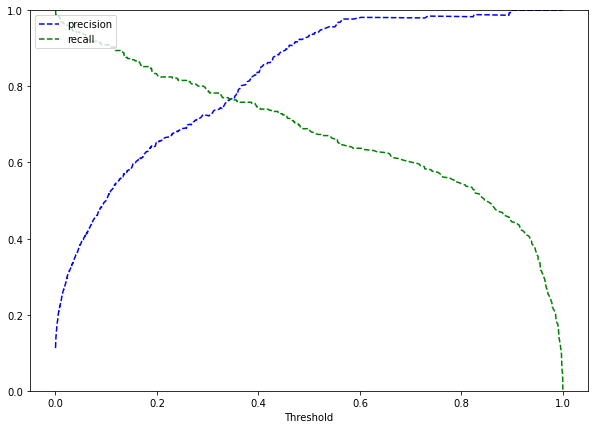

<IPython.core.display.Javascript object>

In [96]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.3, we get balanced recall and precision.

In [97]:
# setting the threshold
optimal_threshold_curve = 0.3

<IPython.core.display.Javascript object>

### Checking model performance on training set

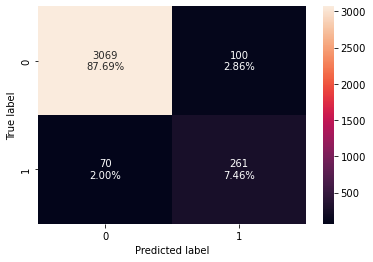

<IPython.core.display.Javascript object>

In [98]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [99]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951429,0.78852,0.722992,0.754335


<IPython.core.display.Javascript object>

### Checking model performance on test set

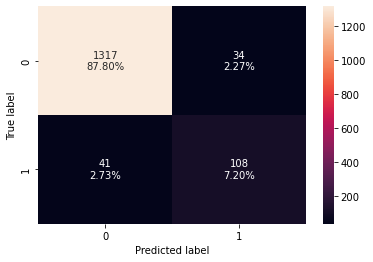

<IPython.core.display.Javascript object>

In [100]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [101]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.95,0.724832,0.760563,0.742268


<IPython.core.display.Javascript object>

* With this model the False negative cases have gone up and recall for test is 72 with 95% accuracy. Model is performing well on training and test set. Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.

### Model Performance Summary

In [102]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.3 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.3 Threshold
Accuracy,0.965714,0.918857,0.951429
Recall,0.685801,0.900302,0.788520
Precision,0.934156,0.542805,0.722992
F1,0.790941,0.677273,0.754335


<IPython.core.display.Javascript object>

In [103]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.3 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.3 Threshold
Accuracy,0.960667,0.923333,0.950000
Recall,0.624161,0.852349,0.724832
Precision,0.968750,0.577273,0.760563
F1,0.759184,0.688347,0.742268


<IPython.core.display.Javascript object>

### Comment
* We have been able to build a predictive model that can be used by the bank to find the liablity customers who are willing to purchase personal loan with recall of 0.78 and f1_score of 0.75 on the training set and customers should be targeted accordingly.
* Coefficients of Experience, Family size 1 and 2, Securities_Account_1, Education_1, Regions_Superior, CD_Account_0 are negative, increase in these values leads the customer not to buy personal loan from the bank.
* Coefficients of Age, Income, Mortgage, Family size of 3 and 4, Education level of 2 and 3, Securities_Account_0, CD_Account_1 and regions of bay area, central, los angeles, southern are positive, increase in these values leads the customers to buy personal loan with the bank.

**Recommendations**
* AllLife Bank should target on liablity customers who has CD_Account with the bank who are more willing to take personal loan with the bank.
* The customers with family size 3 are more willing to take personal loan with the bank.
* Education level of customer is higher than chances of taking personal loan will be higher.
* Customers with Education level of undergraduates took personal loan less.
* Customers who has CD_Account with the bank are more willing to take personal loan.
* Customers from Bay area region are more willing to take personal loan.

### Build Decision Tree Model

In [104]:
# splitting the data

X_dt = loan.drop("Personal_Loan", axis=1)  # Features
y_dt = loan["Personal_Loan"]  # Labels (Target Variable)

<IPython.core.display.Javascript object>

In [105]:
# define a function for encoding
def encode_cat_vars(x):
    x = pd.get_dummies(
        x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist()
    )
    return x


# independent variables with encoded categorical variables
X_num = encode_cat_vars(X)
X_num.head()

,Age,Experience,Income,Mortgage,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Regions_Bay Area,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior
0,25,1,49.0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
1,45,19,34.0,0.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
2,39,15,11.0,0.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
3,35,9,100.0,0.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4,35,8,45.0,0.0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [106]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=1
)
print(X_train.shape, X_test.shape)

(3500, 20) (1500, 20)


<IPython.core.display.Javascript object>

In [107]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [108]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The get_recall_score function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [109]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [110]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model
* We are using 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.
* To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
* class_weight is a hyperparameter for the decision tree classifier.
* Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

### Build Decision Tree Model

In [111]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [112]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

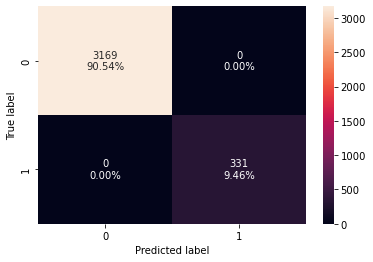

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(model, X_train, y_train)

In [114]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

### Checking model performance on test set

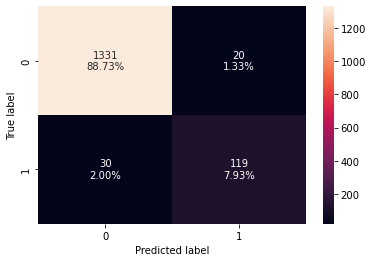

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(model, X_test, y_test)

In [116]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.7986577181208053


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

### Visualizing the Decision Tree

In [117]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

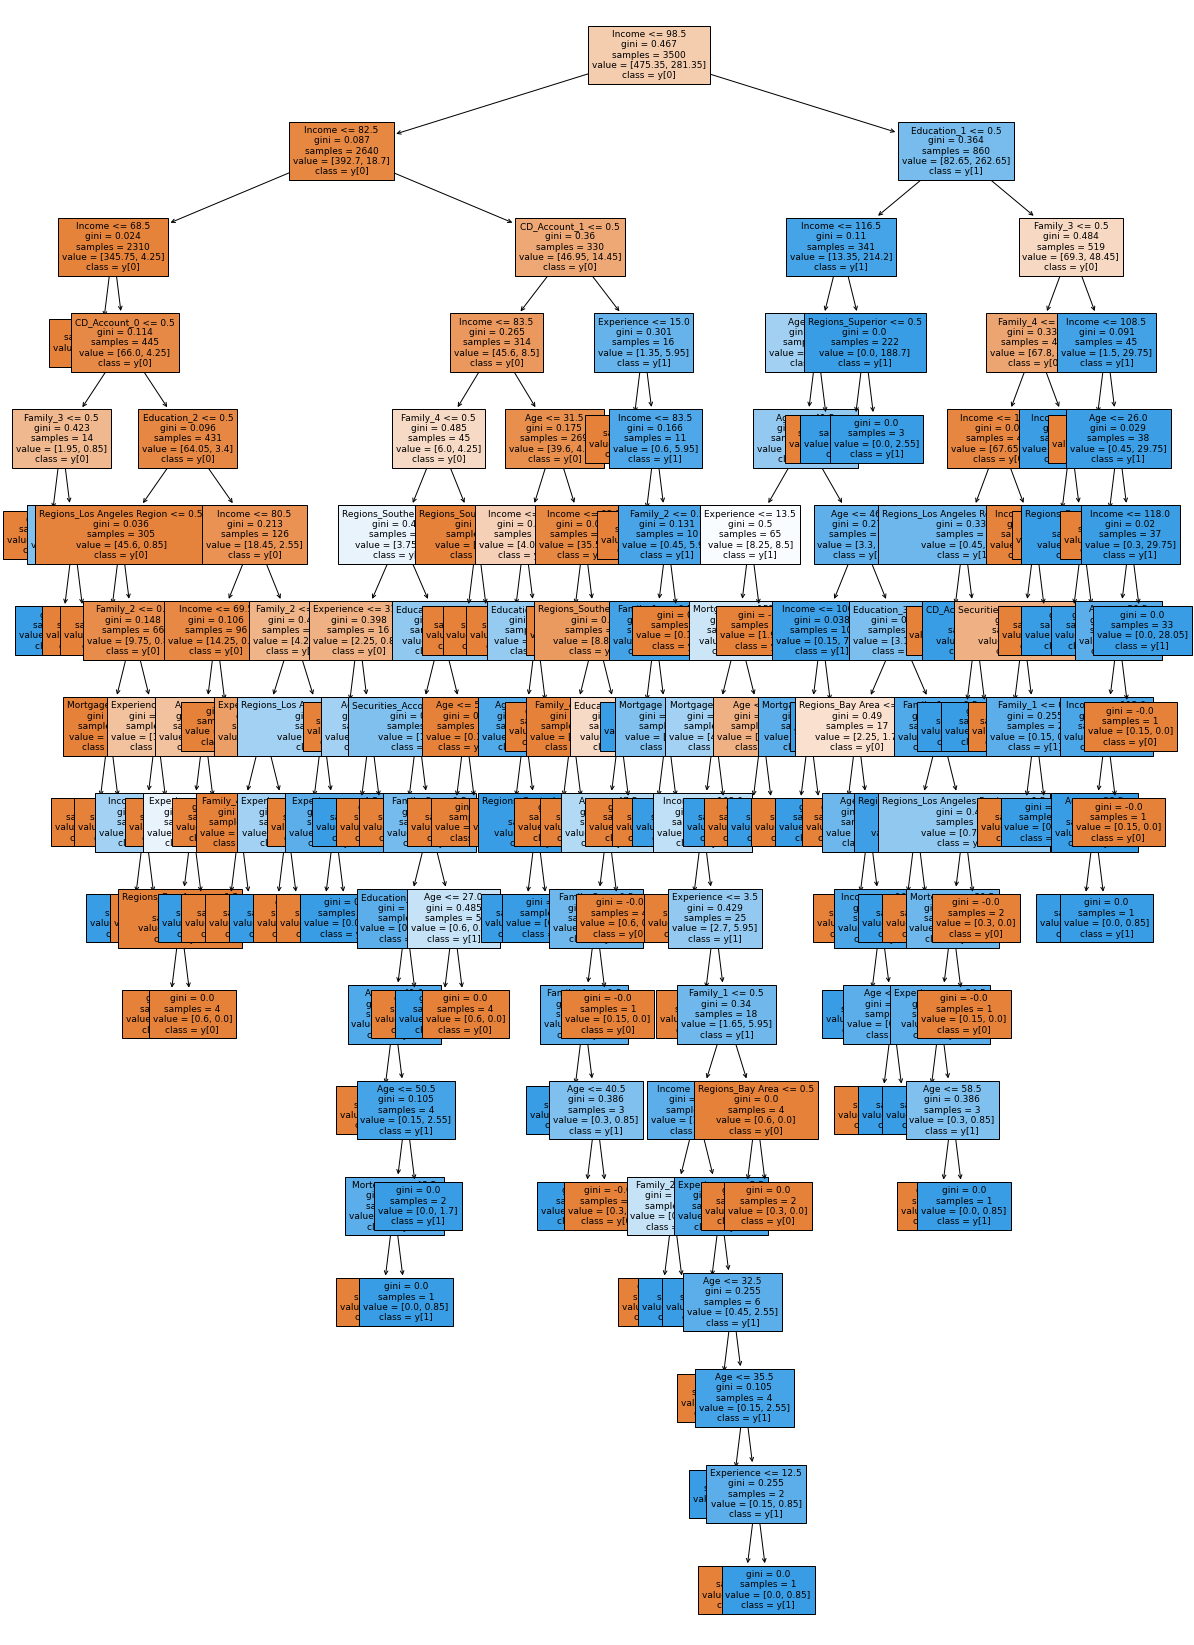

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Decision Tree observation:
* If the customers with the Income <= 98.5K USD and without CD_Account with the bank are not willing to purchase a personal loan from the bank.
* If the customers with the Income >98.5K, education_1 and family size >= 3 are the targetted customers for personal loan campaign.

In [119]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- Income <= 82.50
|   |   |--- Income <= 68.50
|   |   |   |--- weights: [279.75, 0.00] class: 0
|   |   |--- Income >  68.50
|   |   |   |--- CD_Account_0 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- Income <= 76.50
|   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |--- Income >  76.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- CD_Account_0 >  0.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- Regions_Los Angeles Region <= 0.50
|   |   |   |   |   |   |--- weights: [35.85, 0.00] class: 0
|   |   |   |   |   |--- Regions_Los Angeles Region >  0.50
|   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |--- Mortgage <= 39.00
|   |   |   |   |   |   |   |   |--- weights: [5.85, 0.00] class: 0
|   |   |   |   |   |   |   |--- Mortgage >  39.0

<IPython.core.display.Javascript object>

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
Income                      6.169418e-01
Education_1                 1.283204e-01
Family_3                    7.337438e-02
Family_4                    7.117899e-02
Age                         3.484788e-02
Experience                  2.087350e-02
CD_Account_1                1.575446e-02
Mortgage                    6.614835e-03
Family_2                    5.252479e-03
Regions_Southern            5.158355e-03
Regions_Los Angeles Region  4.185481e-03
Education_3                 4.166794e-03
Family_1                    4.125708e-03
Regions_Bay Area            3.465757e-03
Securities_Account_1        2.769228e-03
Education_2                 1.515723e-03
CD_Account_0                9.748996e-04
Securities_Account_0        4.792858e-04
Regions_Superior            1.955822e-15
Regions_Central             1.601820e-18


<IPython.core.display.Javascript object>

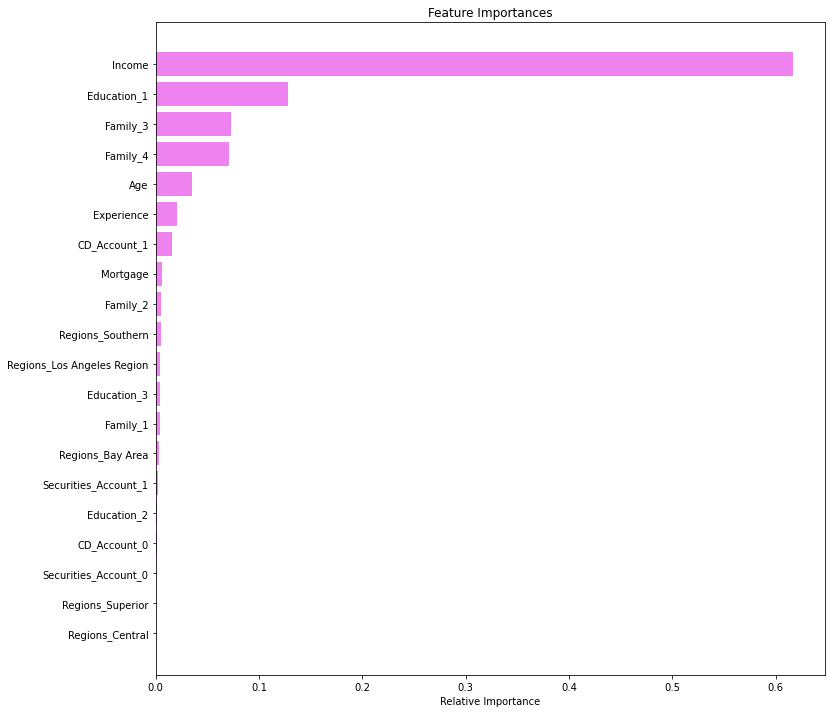

<IPython.core.display.Javascript object>

In [121]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the liablity customers who can purchase personal loan.

### Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [122]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

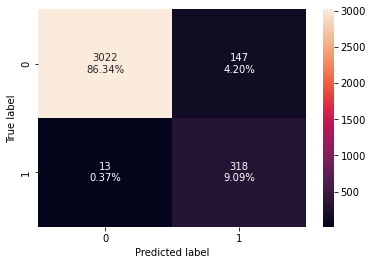

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [124]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9607250755287009


<IPython.core.display.Javascript object>

### Checking performance on test set

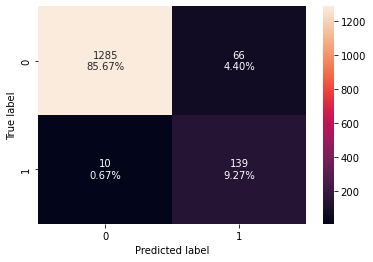

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [126]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9328859060402684


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [127]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [128]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.986825e-15
1,4.401571e-19,-1.986385e-15
2,7.482671e-19,-1.985637e-15
3,7.482671e-19,-1.984889e-15
4,7.482671e-19,-1.984140e-15
5,1.936691e-18,-1.982204e-15
6,1.980707e-18,-1.980223e-15
7,2.332833e-18,-1.977890e-15
8,4.665666e-18,-1.973224e-15
9,4.731689e-18,-1.968493e-15


<IPython.core.display.Javascript object>

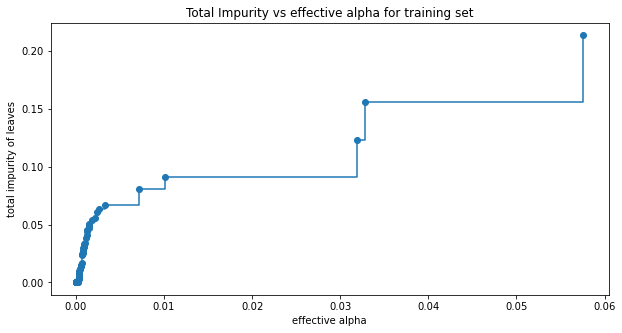

<IPython.core.display.Javascript object>

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [130]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480873


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

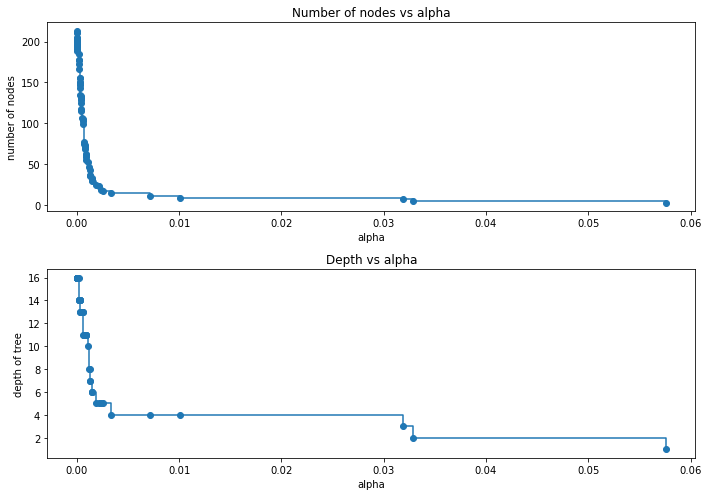

<IPython.core.display.Javascript object>

In [131]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [132]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [133]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [134]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

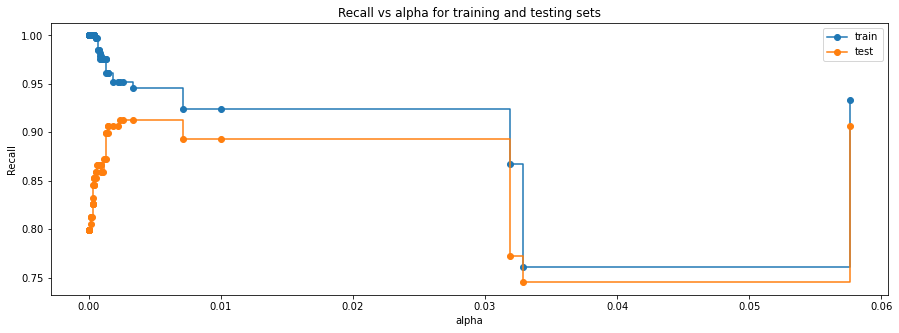

<IPython.core.display.Javascript object>

In [135]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.058 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.003 retaining information and getting higher recall.**

In [136]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0023951821069640583,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [137]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0023951821069640583,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

### checking performance on training set

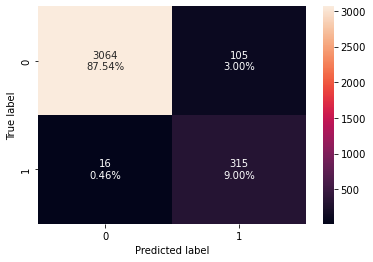

<IPython.core.display.Javascript object>

In [138]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [139]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9516616314199395


<IPython.core.display.Javascript object>

### checking performance on test set

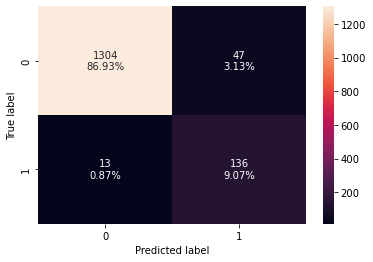

<IPython.core.display.Javascript object>

In [140]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [141]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.912751677852349


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

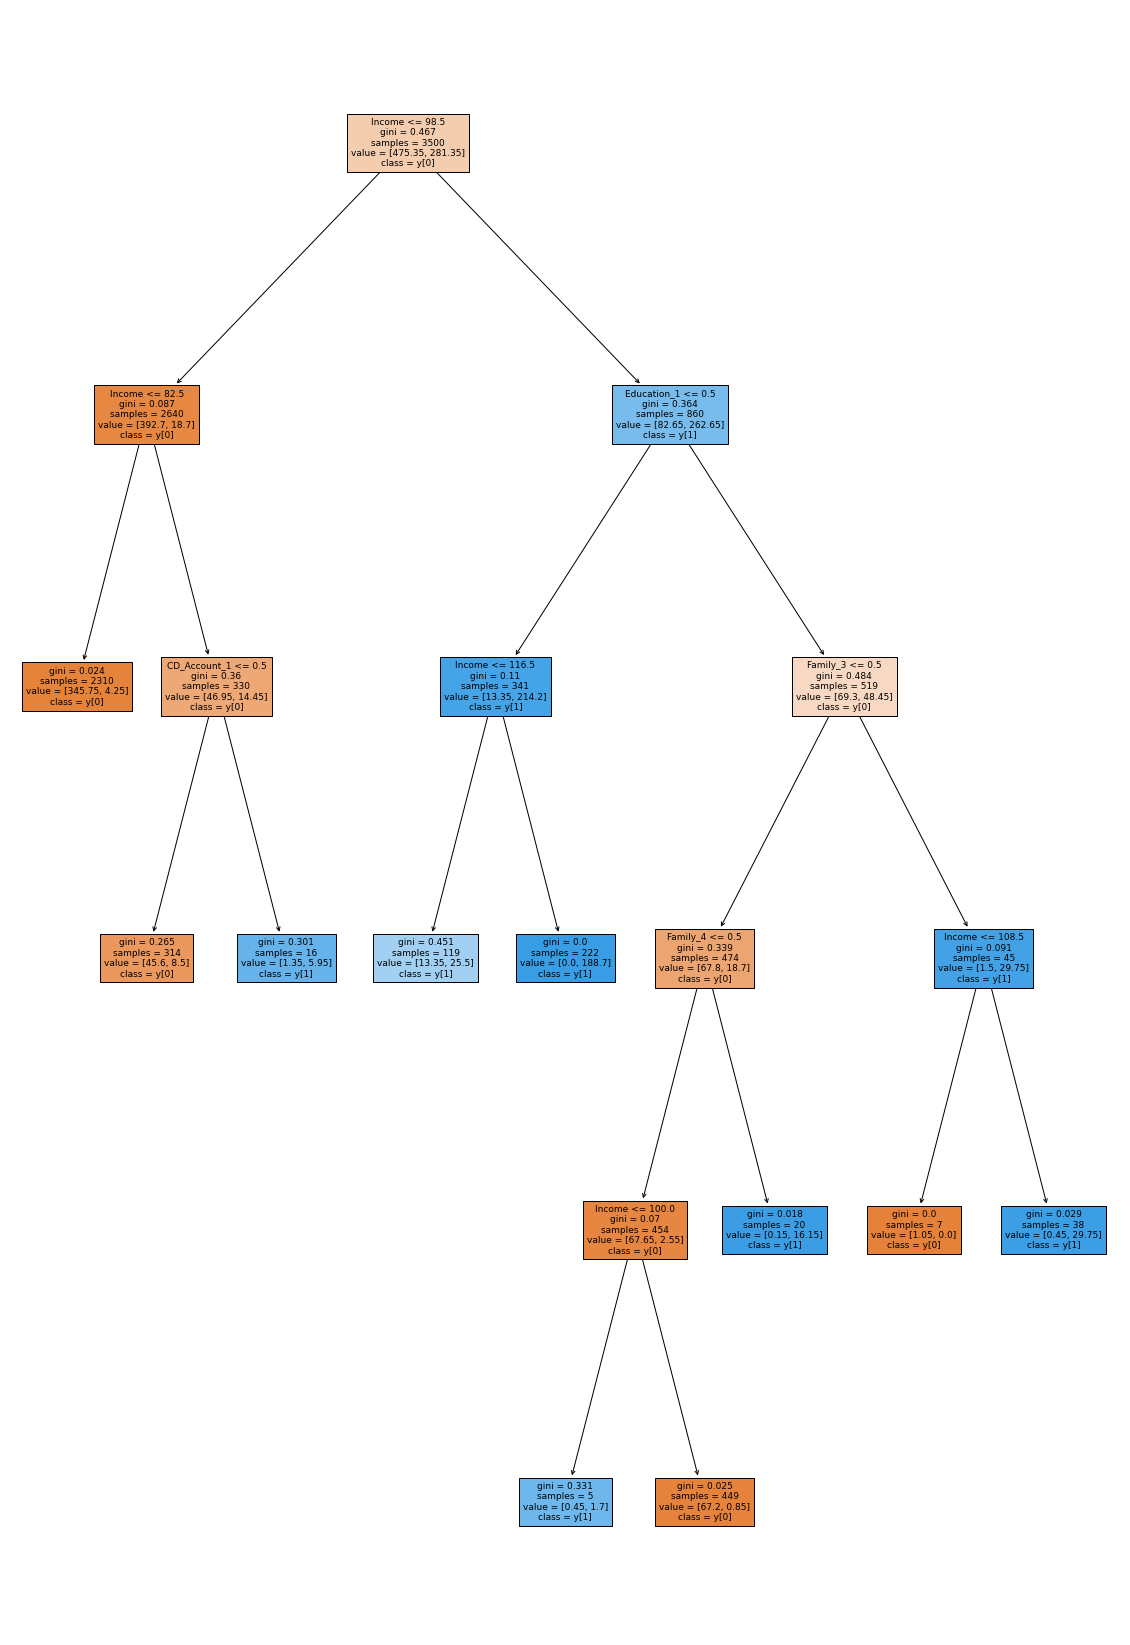

<IPython.core.display.Javascript object>

In [142]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Creating model with 0.003 ccp_alpha

In [143]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

### checking performance on training set

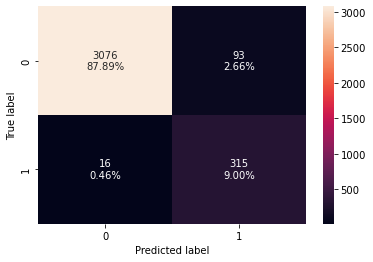

<IPython.core.display.Javascript object>

In [144]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [145]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9516616314199395


<IPython.core.display.Javascript object>

### checking performance on testing set

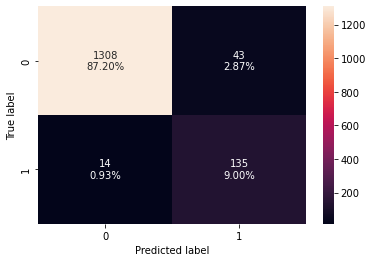

<IPython.core.display.Javascript object>

In [146]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [147]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9060402684563759


<IPython.core.display.Javascript object>

* The results are close to the initial model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

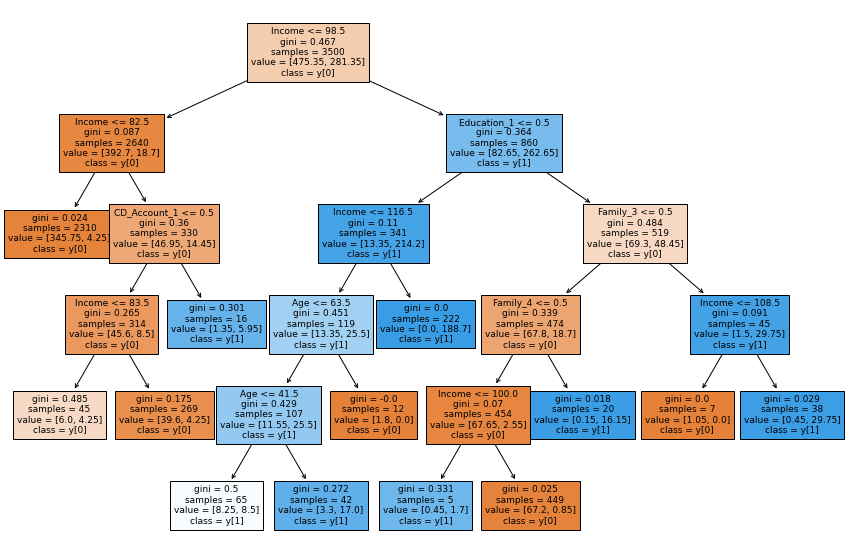

<IPython.core.display.Javascript object>

In [148]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [149]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- Income <= 82.50
|   |   |--- weights: [345.75, 4.25] class: 0
|   |--- Income >  82.50
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 83.50
|   |   |   |   |--- weights: [6.00, 4.25] class: 0
|   |   |   |--- Income >  83.50
|   |   |   |   |--- weights: [39.60, 4.25] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [1.35, 5.95] class: 1
|--- Income >  98.50
|   |--- Education_1 <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- Age <= 63.50
|   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |--- weights: [8.25, 8.50] class: 1
|   |   |   |   |--- Age >  41.50
|   |   |   |   |   |--- weights: [3.30, 17.00] class: 1
|   |   |   |--- Age >  63.50
|   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family_3 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Income <= 100.00
|   |   |   

<IPython.core.display.Javascript object>

In [150]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Income                      0.674743
Education_1                 0.139314
Family_3                    0.079481
Family_4                    0.077065
CD_Account_1                0.017806
Age                         0.011590
Securities_Account_1        0.000000
Regions_Southern            0.000000
Regions_Los Angeles Region  0.000000
Regions_Central             0.000000
Regions_Bay Area            0.000000
CD_Account_0                0.000000
Education_3                 0.000000
Securities_Account_0        0.000000
Experience                  0.000000
Education_2                 0.000000
Family_2                    0.000000
Family_1                    0.000000
Mortgage                    0.000000
Regions_Superior            0.000000


<IPython.core.display.Javascript object>

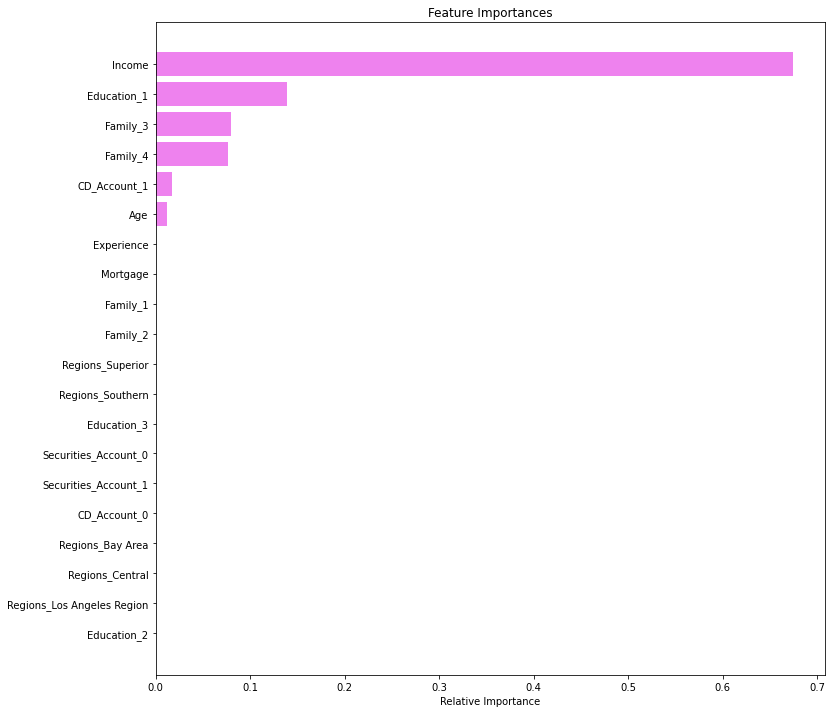

<IPython.core.display.Javascript object>

In [151]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Education_1(undergraduates) are the top two important features to predict the liablity customer who are willing to purchase loan.

### Comparing all the decision tree models

In [152]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.960725
2,0.951662


<IPython.core.display.Javascript object>

In [153]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.798658
1,0.932886
2,0.906040


<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

## Conclusions

- We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
- First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income, Education, CD_account and Family.
- The model built can be used to predict if a customer is going to purchase a personal loan or not.
- Coefficient of Income, Graduate and Advanced Education, Family_3, Family 4, CCavg, CD account, Age are positive, i.e. a one unit increase in these will lead to increase in chances of a person borrowing loan.
- Coefficient of Securities account, online, Family_2 and credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
- We also improved the performance using ROC-AUC curve and optimal threshold. This was best model with high recall.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- We used decision trees with prepruning and post pruning.
- `Income, Education_1, Family_3, Family_4 and CD_Account ` are the most important variable in predicting the customers who can contribute bank to generate revenue by purchasing a personal loan. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Recommendations

* `Based on EDA`:
     * Customers with income greater than 50k dollars willing to buy personal loans.
     * Graduates and Professionals are more willing to buy personal loans.
     * Customers who has CD_Account with bank are more willing to buy personal loans.
     * Credit card spending will not affect the purchase of personal loan.
     * Usage of Online banking facilities will not affect the purchase of personal loan.
     * Customers with other bank credit cards will not affect the purchase of personal loan.
     
* `logistic Regression`:
     * AllLife Bank should target on liablity customers who has CD_Account with the bank who are more willing to take personal loan with the bank.
     * The customers with family size 3 are more willing to take personal loan with the bank.
     * Education level of customer is higher than chances of taking personal loan will be higher.
     * Customers with Education level of undergraduates took personal loan less.
     * Customers who has CD_Account with the bank are more willing to take personal loan.
     * Customers from Bay area region are more willing to take personal loan.
      
* `According to Decision tree model`:
      a) If the customers with the Income <= 98.5K USD and without CD_Account with the bank are not willing to purchase a personal loan from the bank.
      b) If the customers with the Income >98.5K, education_1(undergrates) and age is less than 63years are the targetted customers for personal loan campaign.

    * It is observed that the customers who are undergraduates with more Income and age less than 63 years are more likely contributing to the revenue of the bank by purchasing a personal loan. 

    * Employ the predictive model to predict potential customers (customers who can buy the personal loan), Offer limited-time discounts on interest rates only to those customers. 

    * So for this campaign we can have different profiles for customers
        * High Profile Clients :- Income range of 98.5k to 116K, undergraduate with age in range of 41 to 63 years.
        * Average Profile :- Income range range of 98.5 to 100k, 3/4 Family members.
        * Low Profile:- Lower income group less than 82K and CD_Account with the bank.
    
* Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.

* We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.

* Prequalifying for Loan can also attract more customers.

* Our 2nd target would be Medium profile customers.

* The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.